# Demo 4: Naïve Bayes Text Classification


## 1. Import Required Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

## 2. Prepare Output Folder

In [ ]:
SCRIPT_DIR = os.getcwd()
OUT_DIR = os.path.join(SCRIPT_DIR, "introai4")
os.makedirs(OUT_DIR, exist_ok=True)
print("Saving to:", OUT_DIR)

Saving to: c:\Users\Jeen\Desktop\introai\introai4\introai4


## 3. Load and Split Data

We use four categories from the 20 Newsgroups dataset.

In [ ]:
categories = ["rec.sport.baseball", "rec.sport.hockey", "sci.space", "talk.politics.mideast"]
newsgroups = fetch_20newsgroups(subset="all", categories=categories, remove=("headers","footers","quotes"))

X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.25, random_state=42
)

## 4. Build and Train Pipeline

Pipeline: TfidfVectorizer + MultinomialNB

In [ ]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", MultinomialNB())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

## 5. Predict and Evaluate

Print test accuracy and classification report.

In [ ]:
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

print("Test Accuracy:", round(acc, 3))
print("\nClassification Report:\n", report)

Test Accuracy: 0.901

Classification Report:
                        precision    recall  f1-score   support

   rec.sport.baseball       0.81      0.89      0.85       232
     rec.sport.hockey       0.90      0.91      0.90       261
            sci.space       0.97      0.90      0.93       261
talk.politics.mideast       0.92      0.91      0.92       226

             accuracy                           0.90       980
            macro avg       0.90      0.90      0.90       980
         weighted avg       0.90      0.90      0.90       980



## 6. Visualize Confusion Matrix

Plot and save the confusion matrix.

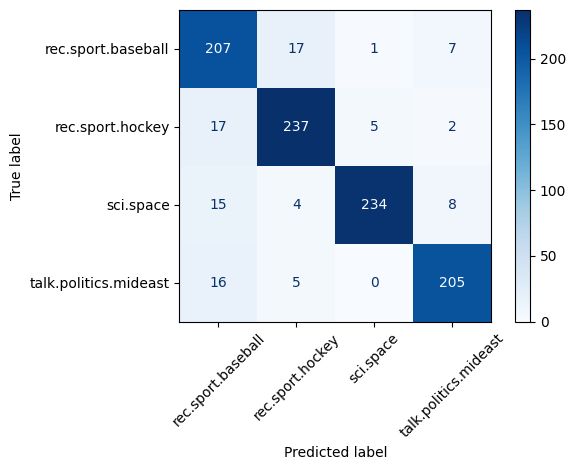

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups.target_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "confusion_matrix.png"))
plt.show()

## 7. Save Summary

Save accuracy and classification report to summary.txt.

In [ ]:
with open(os.path.join(OUT_DIR, "summary.txt"), "w") as f:
    f.write("Demo 4: Naïve Bayes Classification\n")
    f.write(f"Test Accuracy: {acc:.3f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)

print("Saved images to:", OUT_DIR)
print(" - confusion_matrix.png")
print("Summary saved to summary.txt")

Saved images to: c:\Users\Jeen\Desktop\introai\introai4\introai4
 - confusion_matrix.png
Summary saved to summary.txt
